In [129]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
%matplotlib inline
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

In [6]:
df = pd.read_excel('ecorr_raw_data.xls')

In [49]:
df

,Proj no.,TO no.,Coil no.,Sample no.,WS,Brazed,Depth [μm],Unit,Al,Si,...,In,Li,Na,P,Pb,Sn,Sr,V,Zr,Ecorr[mV]
0,G17-0054,432431,S02798,P18-00305BL,0,1,0.1466,m%,65.02,26.694,...,0.000,0.0,0.1797,0.0121,0.610,0.473,0.6694,0.078,0.031,-720.01919
1,G17-0054,432431,S02798,P18-00305BL,0,1,0.2875,m%,58.17,39.426,...,0.000,0.0,0.0033,0.0024,0.013,0.068,0.0372,0.022,0.010,-719.661113
2,G17-0054,432431,S02798,P18-00305BL,0,1,0.4333,m%,58.95,39.146,...,0.000,0.0,0.0009,0.0022,0.006,0.043,0.0156,0.017,0.008,-719.300728
3,G17-0054,432431,S02798,P18-00305BL,0,1,0.5772,m%,61.44,36.913,...,0.000,0.0,0.0002,0.0021,0.001,0.032,0.0093,0.014,0.003,-718.955004
4,G17-0054,432431,S02798,P18-00305BL,0,1,0.7262,m%,65.58,32.960,...,0.000,0.0,0.0000,0.0021,0.010,0.016,0.0068,0.013,0.003,-718.607299
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5995,G18-0053,430440,S013541,P18-00208-LS-S1,0,1,121.6161,m%,97.25,0.218,...,0.003,0.0,0.0015,0.0019,0.043,0.019,0.0002,0.011,0.003,-691.035983
5996,G18-0053,430440,S013541,P18-00208-LS-S1,0,1,121.7364,m%,97.22,0.223,...,0.004,0.0,0.0016,0.0019,0.051,0.015,0.0003,0.012,0.002,-691.03055
5997,G18-0053,430440,S013541,P18-00208-LS-S1,0,1,121.8569,m%,97.21,0.218,...,0.004,0.0,0.0016,0.0019,0.045,0.022,0.0004,0.012,0.008,-691.025113
5998,G18-0053,430440,S013541,P18-00208-LS-S1,0,1,121.9775,m%,97.21,0.219,...,0.005,0.0,0.0016,0.0019,0.046,0.023,0.0003,0.010,0.007,-691.019678


In [9]:
df_Ecorr_Value = df[df['Ecorr[mV]'] != 'NAN']

In [10]:
df_Ecorr_Value.shape

(5212, 36)

In [15]:
df_Ecorr_Value['Ecorr[mV]'].values

array([-720.01918974, -719.66111334, -719.30072778, ..., -691.02511313,
       -691.01967752, -691.01424885])

In [17]:
df_Ecorr_Value.columns

Index(['Proj no.', 'TO no.', 'Coil no.', 'Sample no.', 'WS', 'Brazed',
       'Depth [μm]', 'Unit', 'Al', 'Si', 'Fe', 'Cu', 'Mn', 'Mg', 'Cr', 'Ni-L',
       'Ni-H', 'Zn', 'Ti', 'B', 'Be', 'Bi', 'Ca', 'Cd', 'Ga', 'Hg', 'In', 'Li',
       'Na', 'P', 'Pb', 'Sn', 'Sr', 'V', 'Zr', 'Ecorr[mV]'],
      dtype='object')

In [20]:
df_model = df_Ecorr_Value[['Al', 'Si', 'Fe', 'Cu', 'Mn', 'Mg', 'Cr', 'Ni-L',
       'Zn', 'Ti', 'B', 'Be', 'Bi', 'Ca', 'Cd', 'Ga', 'Hg', 'In', 
       'Na', 'P', 'Pb', 'Sn', 'Sr', 'V', 'Zr', 'Ecorr[mV]']]

In [29]:
df_model = df_model.apply(pd.to_numeric, errors='coerce')

In [32]:
df_model.describe()

,Al,Si,Fe,Cu,Mn,Mg,Cr,Ni-L,Zn,Ti,...,Hg,In,Na,P,Pb,Sn,Sr,V,Zr,Ecorr[mV]
count,5212.000000,5212.000000,5212.000000,5212.000000,5212.000000,5212.00000,5212.000000,5212.000000,5212.000000,5212.000000,...,5212.000000,5212.000000,5212.000000,5212.000000,5212.000000,5212.000000,5212.000000,5212.000000,5212.000000,5212.000000
mean,96.408563,1.352391,0.192121,0.318446,1.270538,0.12174,0.000537,0.006419,0.118043,0.108004,...,0.000613,0.000473,0.000559,0.002120,0.027969,0.009533,0.000802,0.011148,0.029647,-697.871957
std,2.973611,3.147103,0.087681,0.170617,0.444255,0.25185,0.000632,0.002218,0.299506,0.057584,...,0.001838,0.000959,0.003770,0.000372,0.020159,0.023689,0.019948,0.005389,0.046293,17.257512
min,58.170000,0.041000,0.036000,0.038000,0.056000,0.00000,0.000000,0.003000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.001900,0.000000,0.000000,0.000000,0.001000,0.000000,-753.684832
25%,96.440000,0.216000,0.143000,0.158000,1.340000,0.01800,0.000000,0.005000,0.008000,0.038000,...,0.000000,0.000000,0.000000,0.002000,0.020000,0.000000,0.000000,0.008000,0.000000,-711.335567
50%,97.060000,0.561500,0.215000,0.327000,1.407000,0.11300,0.000000,0.006000,0.014000,0.142000,...,0.000300,0.000000,0.000000,0.002100,0.031000,0.007000,0.000000,0.012000,0.004000,-693.032697
75%,97.260000,1.449000,0.228000,0.498000,1.472000,0.16900,0.001000,0.008000,0.021000,0.149000,...,0.000900,0.000000,0.001000,0.002200,0.038000,0.016000,0.000100,0.013000,0.046000,-683.377955
max,97.990000,39.426000,1.558000,0.557000,1.820000,14.96700,0.010000,0.088000,1.308000,0.183000,...,0.075700,0.005000,0.179700,0.015700,0.610000,0.875000,0.714300,0.148000,0.157000,-674.628661


<ipython-input-50-4b0f403144b5>:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  df_model.hist(ax = ax)


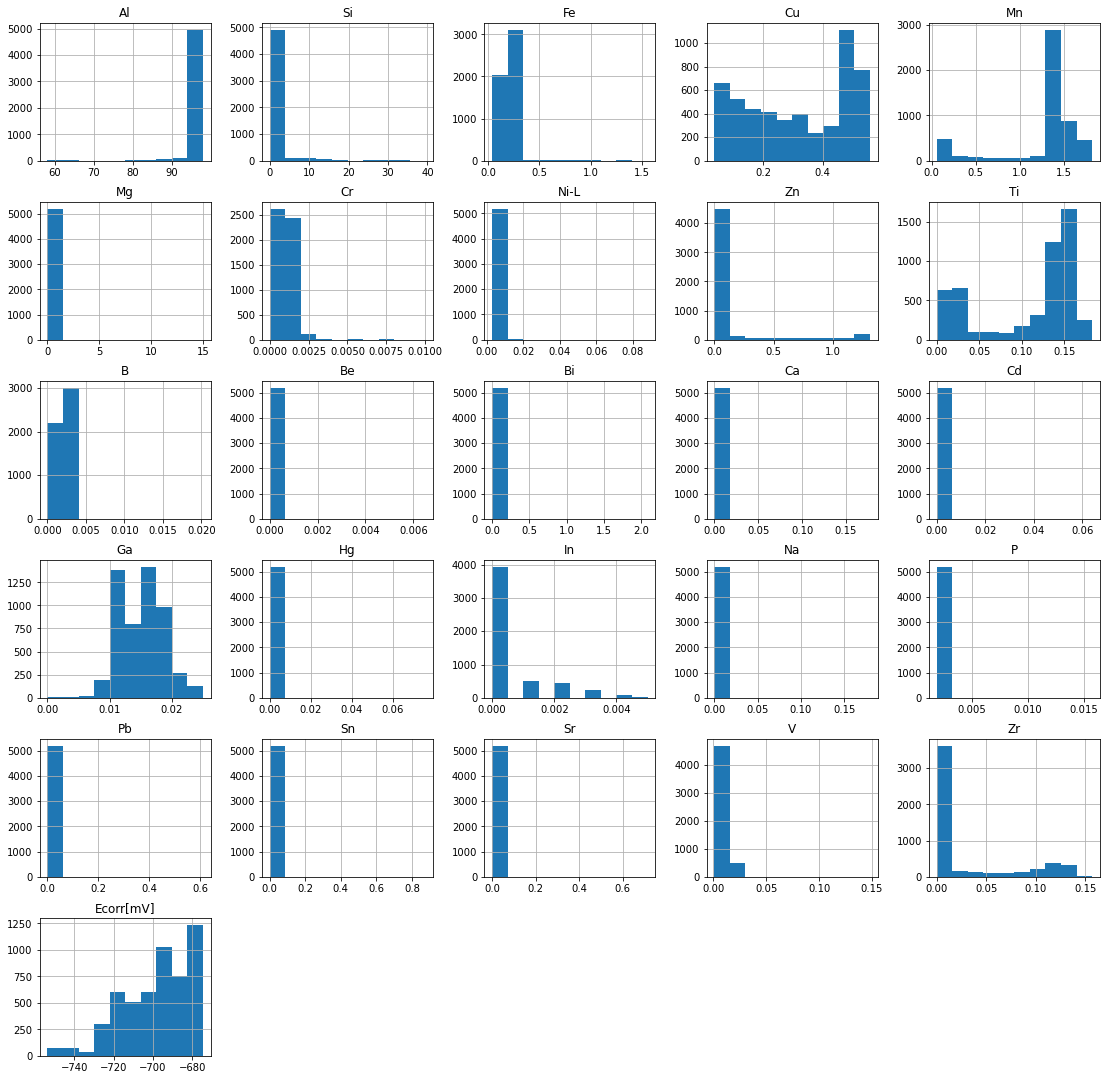

In [50]:
fig = plt.figure(figsize = (19,19))
ax = fig.gca()
df_model.hist(ax = ax)
plt.show()

C:\Users\Dell\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 8.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


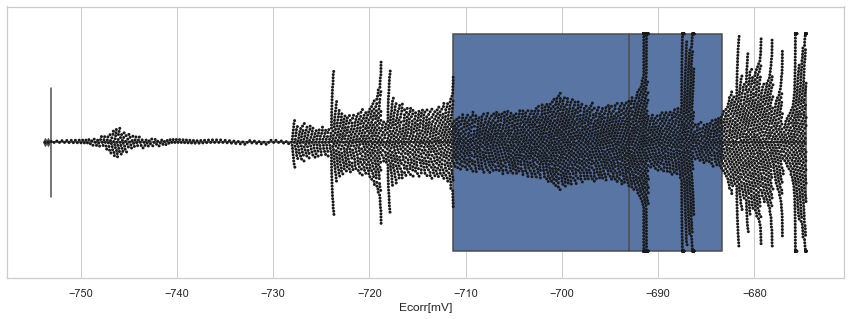

In [93]:
fig = plt.figure(figsize = (15,5))
ax = sns.boxplot(x=df_model['Ecorr[mV]'])
ax = sns.swarmplot(x=df_model['Ecorr[mV]'], size=3 ,color=".1")
plt.show()

In [94]:
df_model.corr()

,Al,Si,Fe,Cu,Mn,Mg,Cr,Ni-L,Zn,Ti,...,Hg,In,Na,P,Pb,Sn,Sr,V,Zr,Ecorr[mV]
Al,1.000000,-0.966081,-0.681104,0.285078,0.309888,-0.125378,-0.293770,-0.371846,-0.027888,0.391553,...,-0.491896,0.144804,-0.295293,-0.339665,0.033715,-0.308713,-0.388303,-0.257482,-0.040064,0.354439
Si,-0.966081,1.000000,0.551778,-0.403242,-0.502587,0.003979,0.261111,0.229231,-0.107360,-0.502164,...,0.395826,-0.175596,0.212455,0.234302,-0.206969,0.206866,0.303889,0.227315,-0.005384,-0.400899
Fe,-0.681104,0.551778,1.000000,0.001914,0.306768,0.008184,0.539496,0.405496,0.003088,0.015577,...,0.470962,0.165602,0.310970,0.250176,0.313354,0.422501,0.342746,0.479535,0.215387,-0.095195
Cu,0.285078,-0.403242,0.001914,1.000000,0.387531,0.232276,0.100644,0.072009,-0.029162,0.826429,...,-0.116334,0.477345,0.038668,-0.022266,0.476994,0.054852,-0.037848,-0.284200,-0.587235,0.814088
Mn,0.309888,-0.502587,0.306768,0.387531,1.000000,0.018519,0.065725,0.195683,0.212018,0.530747,...,-0.000269,0.135343,-0.007779,-0.040288,0.503294,0.063812,-0.061782,0.047409,0.363893,0.285263
Mg,-0.125378,0.003979,0.008184,0.232276,0.018519,1.000000,-0.024797,0.367391,0.125953,0.143912,...,0.308748,-0.024630,0.333870,0.488776,0.496771,0.438024,0.389489,0.066888,-0.152545,0.123478
Cr,-0.293770,0.261111,0.539496,0.100644,0.065725,-0.024797,1.000000,0.065587,-0.289095,0.101723,...,0.339394,0.387218,0.373524,0.170168,0.348959,0.468295,0.326025,0.454330,-0.050302,0.122401
Ni-L,-0.371846,0.229231,0.405496,0.072009,0.195683,0.367391,0.065587,1.000000,0.242542,0.081435,...,0.658199,-0.129577,0.637748,0.695964,0.529380,0.576583,0.647194,0.350261,0.006396,0.101902
Zn,-0.027888,-0.107360,0.003088,-0.029162,0.212018,0.125953,-0.289095,0.242542,1.000000,-0.132906,...,0.053372,-0.162788,-0.025076,0.171016,0.005455,-0.086943,0.001985,-0.179170,0.248703,-0.357580
Ti,0.391553,-0.502164,0.015577,0.826429,0.530747,0.143912,0.101723,0.081435,-0.132906,1.000000,...,-0.137867,0.338498,0.009081,-0.028121,0.436768,0.058112,-0.068015,-0.277854,-0.458198,0.853389


In [95]:
df_model.corr()['Ecorr[mV]']

Al           0.354439
Si          -0.400899
Fe          -0.095195
Cu           0.814088
Mn           0.285263
Mg           0.123478
Cr           0.122401
Ni-L         0.101902
Zn          -0.357580
Ti           0.853389
B            0.658954
Be          -0.085850
Bi          -0.120013
Ca           0.006092
Cd          -0.059585
Ga           0.704611
Hg          -0.159050
In           0.337260
Na           0.017895
P           -0.077671
Pb           0.427688
Sn           0.035667
Sr          -0.052941
V           -0.237506
Zr          -0.629409
Ecorr[mV]    1.000000
Name: Ecorr[mV], dtype: float64

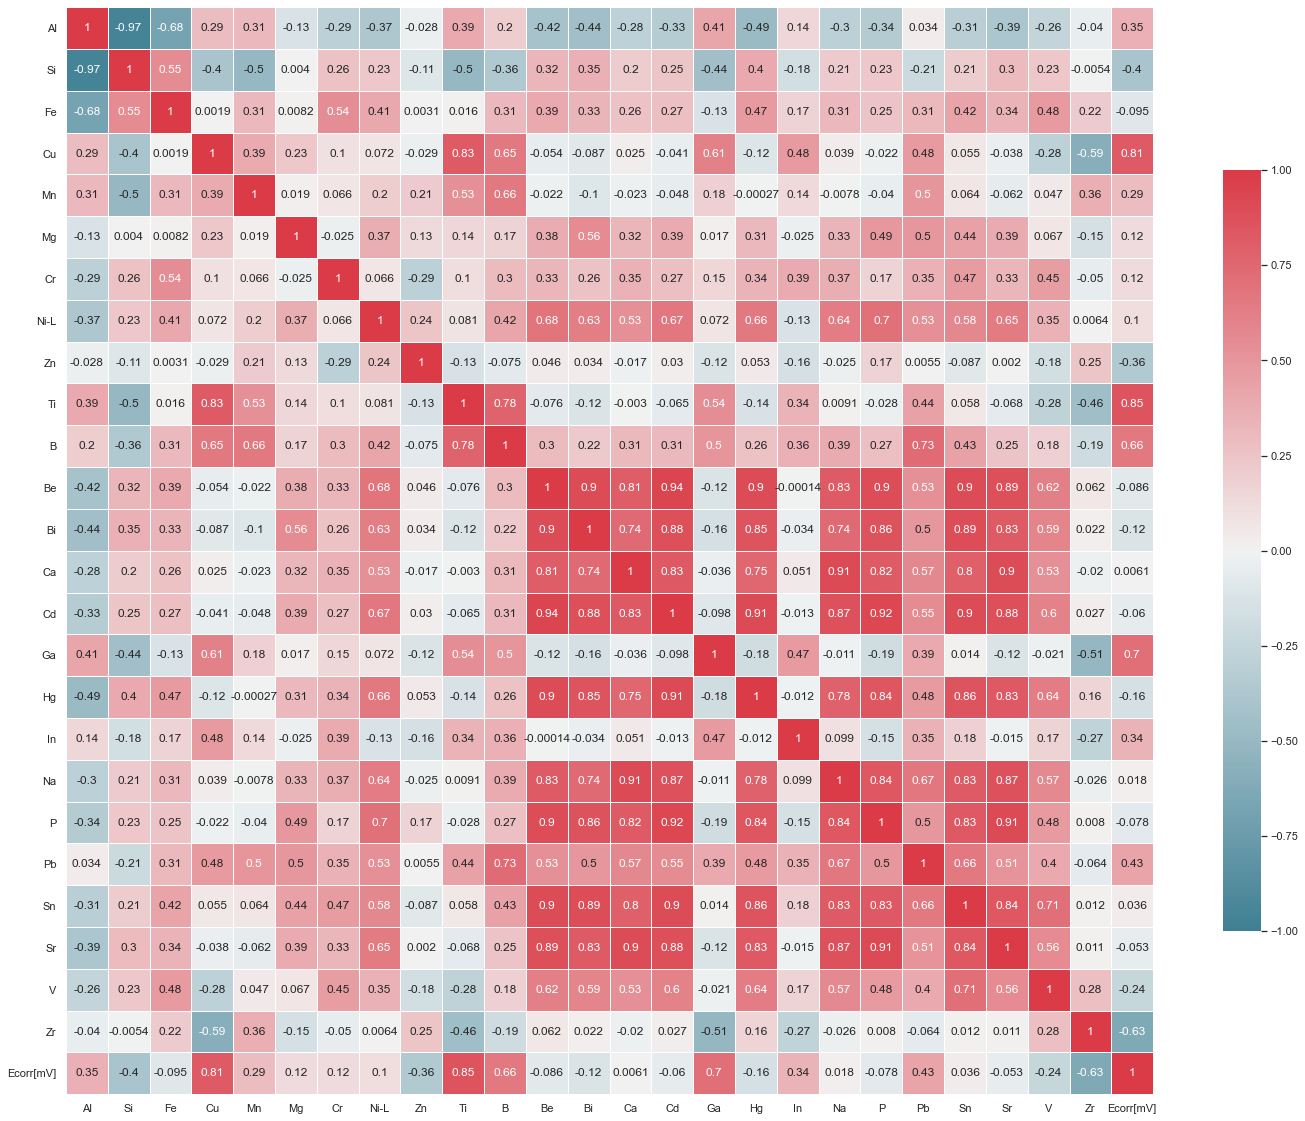

In [127]:
fig = plt.figure(figsize = (25,20))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(df_model.corr(), cmap=cmap, square= True, linewidths= 0.5, annot=True, cbar_kws={"shrink": .7}, vmin= -1, vmax=1)
plt.yticks(rotation=0) 
plt.show()

In [130]:
df.to_csv('raw_data_csv_format.csv')
df_model.to_csv('df_model.csv')

In [144]:
df_model.columns

Index(['Al', 'Si', 'Fe', 'Cu', 'Mn', 'Mg', 'Cr', 'Ni-L', 'Zn', 'Ti', 'B', 'Be',
       'Bi', 'Ca', 'Cd', 'Ga', 'Hg', 'In', 'Na', 'P', 'Pb', 'Sn', 'Sr', 'V',
       'Zr', 'Ecorr[mV]'],
      dtype='object')

In [145]:
df_model_reg = df_model[['Al', 'Si', 'Fe', 'Cu', 'Mn', 'Mg', 'Cr', 'Ni-L', 'Zn', 'Ti', 'B', 'Be',
       'Bi', 'Ga', 'Hg', 'In', 'P', 'Pb', 'Sr', 'V', 'Zr', 'Ecorr[mV]']]

In [159]:
for i in df_model_reg.columns:
    if i != 'Ecorr[mV]':
        pearson_coef, p_value = stats.pearsonr(df_model_reg[i], df_model_reg['Ecorr[mV]'])
        print(f'{i} >>> The Pearson Correlation Coefficient is {pearson_coef} and with a P-value of P ={p_value}')
        if p_value <= 0.001:
            print(f'{i} is statistically significant')
        elif p_value <= 0.05:
            print(f'{i} is statistically moderate')
        else:
            print(f'{i} is statistically not significant')
        print('-----')

Al >>> The Pearson Correlation Coefficient is 0.35443903572134583 and with a P-value of P =4.105306417885574e-154
Al is statistically significant
-----
Si >>> The Pearson Correlation Coefficient is -0.4008988354267149 and with a P-value of P =1.650460609499802e-200
Si is statistically significant
-----
Fe >>> The Pearson Correlation Coefficient is -0.09519474947125267 and with a P-value of P =5.718102575152615e-12
Fe is statistically significant
-----
Cu >>> The Pearson Correlation Coefficient is 0.8140883578322627 and with a P-value of P =0.0
Cu is statistically significant
-----
Mn >>> The Pearson Correlation Coefficient is 0.28526307840778037 and with a P-value of P =3.651388623367862e-98
Mn is statistically significant
-----
Mg >>> The Pearson Correlation Coefficient is 0.12347848133945137 and with a P-value of P =3.667820145351577e-19
Mg is statistically significant
-----
Cr >>> The Pearson Correlation Coefficient is 0.12240123573670164 and with a P-value of P =7.453866947834909e-

In [160]:
df_model_reg.shape

(5212, 22)